In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn . linear_model import LogisticRegression
from sklearn . metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report
from sklearn . metrics import accuracy_score, precision_score, recall_score

In [15]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                            random_state=213, n_clusters_per_class=1, class_sep=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

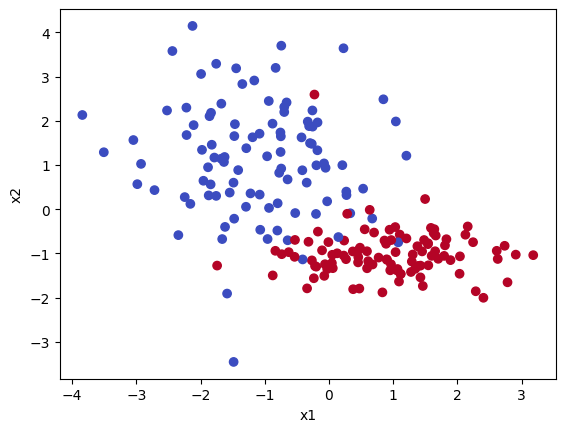

In [16]:
plt.scatter(X_train[:,0], X_train[:,1], label='training', cmap='coolwarm', c= y_train)
plt.scatter(X_test[:,0], X_test[:,1], label='test', cmap='coolwarm', c= y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [17]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [18]:
coef = LogReg.coef_[0]
intercept = LogReg.intercept_
print(coef)
print(intercept)

def decision_boundary(x1):
    return (-coef[0]*x1 - intercept) / coef[1]


[ 1.64842656 -1.57037033]
[-0.27465459]


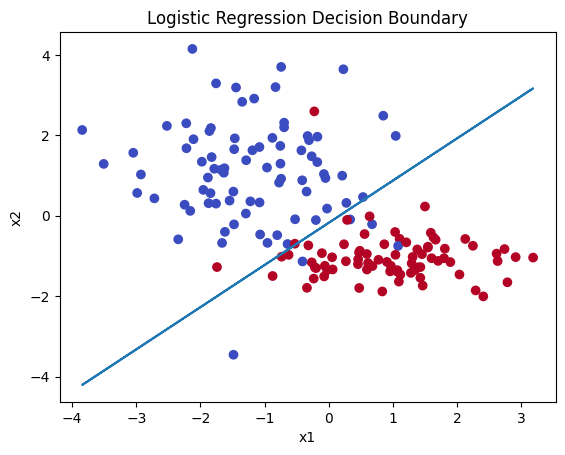

In [19]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.plot(X_train[:, 0], decision_boundary(X_train[:, 0]))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

Confusion Matrix:  [[16  2]
 [ 1 21]]


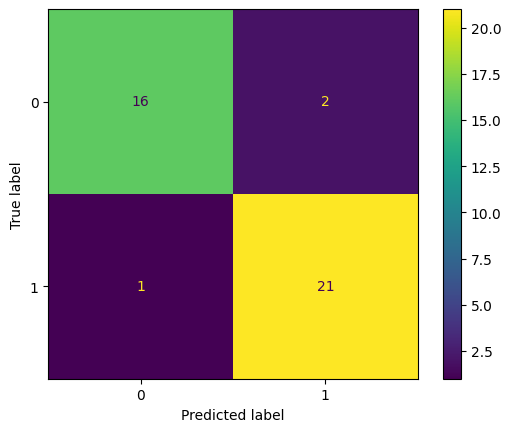

In [20]:
y_pred = LogReg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cm)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [21]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy 0.925
Precision 0.9130434782608695
Recall 0.9545454545454546
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.91      0.95      0.93        22

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



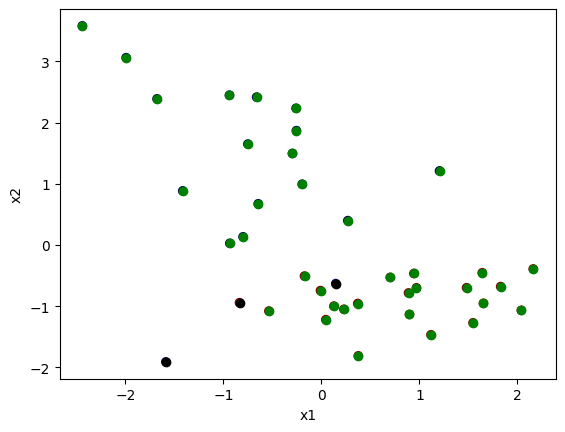

In [22]:
plt.scatter(X_test[:,0], X_test[:,1], cmap='seismic', c=y_test)
for i in range(len(y_test)):
  if y_pred[i] == y_test[i]:
    plt.scatter(X_test[i, 0], X_test[i, 1], c='g')
  else:
    plt.scatter(X_test[i, 0], X_test[i, 1], c='k')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [24]:
labels= {0:'Adelie', 1:'Chinstrap', 2:'Gentoo'}

def plot_decision_regions(X, y, classifier, resolution=0.02):
    plt.figure()
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    edgecolor = 'w',
                    label=labels[cl])
    plt.show()

# ucitaj podatke
df = pd.read_csv("penguins.csv")

# izostale vrijednosti po stupcima
print(df.isnull().sum())

# spol ima 11 izostalih vrijednosti; izbacit cemo ovaj stupac
df = df.drop(columns=['sex'])

# obrisi redove s izostalim vrijednostima
df.dropna(axis=0, inplace=True)

# kategoricka varijabla vrsta - kodiranje
df['species'].replace({'Adelie' : 0,
                        'Chinstrap' : 1,
                        'Gentoo': 2}, inplace = True)

print(df.info())

# izlazna velicina: species
output_variable = ['species']

# ulazne velicine: bill length, flipper_length
input_variables = ['bill_length_mm',
                    'flipper_length_mm',]

X = df[input_variables].to_numpy()
y = df[output_variable].to_numpy()[:,0]

# podjela train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    int64  
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 18.7+ KB
None


C:\Users\Marko\AppData\Local\Temp\ipykernel_10592\2317393473.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['species'].replace({'Adelie' : 0,
C:\Users\Marko\AppData\Local\Temp\ipykernel_10592\2317393473.py:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'].replace({'Adelie' : 0

[0 1 2] [124  51  98]
[0 1 2] [27 17 25]


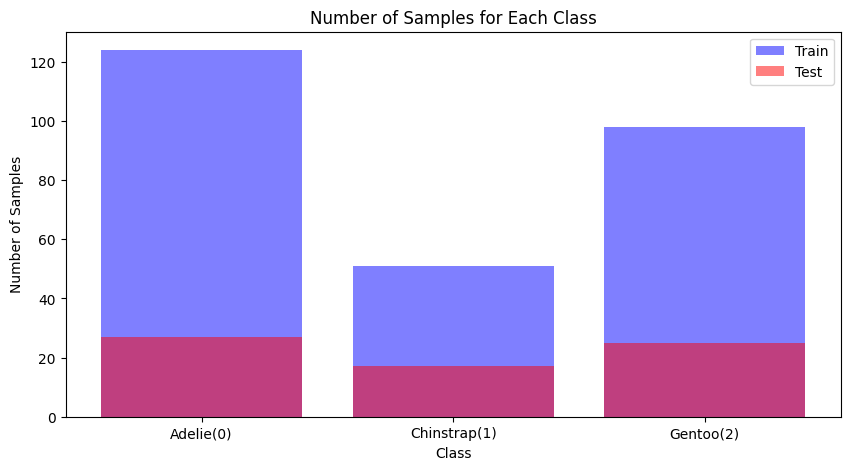

In [30]:
train_classes, train_counts = np.unique(y_train, return_counts=True)
print(train_classes, train_counts)
test_classes, test_counts = np.unique(y_test, return_counts=True)
print(test_classes, test_counts)

plt.figure(figsize=(10, 5))
plt.bar(train_classes, train_counts, color='blue', alpha=0.5, label='Train')
plt.bar(test_classes, test_counts, color='red', alpha=0.5, label='Test')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples for Each Class')
plt.xticks(train_classes, ['Adelie(0)', 'Chinstrap(1)', 'Gentoo(2)'])
plt.legend()
plt.show()

In [26]:
logisticRegression = LogisticRegression(max_iter=130)
logisticRegression.fit(X_train, y_train)

LogisticRegression(max_iter=130)

In [27]:
teta0 = logisticRegression.intercept_
coefs = logisticRegression.coef_
print('Teta0:')
print(teta0)
print('Parametri modela')
print(coefs)


Teta0:
[ 54.2089267   22.4089663  -76.61789301]
Parametri modela
[[-0.6492944  -0.12385688]
 [ 0.75364001 -0.27793319]
 [-0.10434563  0.40179007]]


C:\Users\Marko\AppData\Local\Temp\ipykernel_10592\2317393473.py:23: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


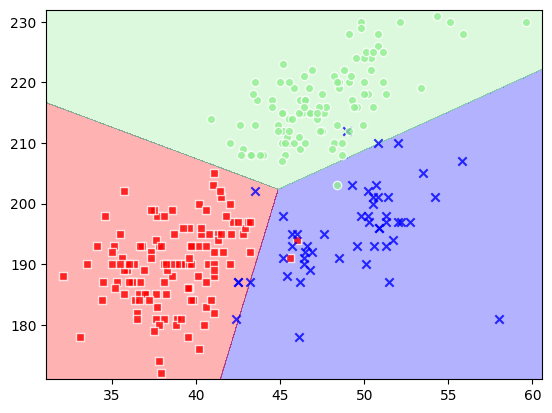

In [28]:
plot_decision_regions(X_train, y_train, logisticRegression)

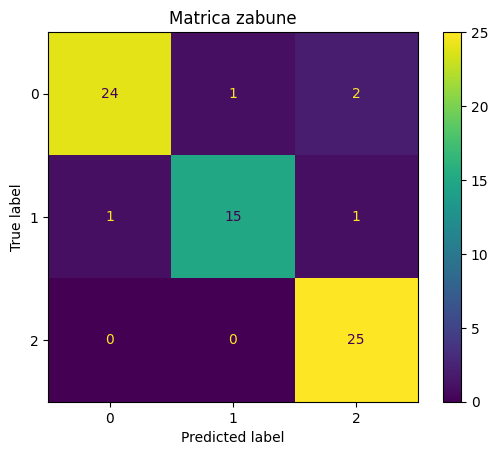

Točnost: 0.927536231884058
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.94      0.88      0.91        17
           2       0.89      1.00      0.94        25

    accuracy                           0.93        69
   macro avg       0.93      0.92      0.93        69
weighted avg       0.93      0.93      0.93        69



In [29]:
y_prediction = logisticRegression.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_prediction))
disp.plot()
plt.title('Matrica zabune')
plt.show()
print(f'Točnost: {accuracy_score(y_test,y_prediction)}')
print(classification_report(y_test,y_prediction))
